In [1]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
import re
from pylab import rcParams
from sklearn import linear_model
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = 7,7
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

### Import Data

In [3]:
os.chdir("/home/cadeniran/u1/amphiscan-pep/")
df = pd.read_csv("corrdata.csv", header=None, sep=',', engine='python', names=['Protein', 'X', 'Y', 'Z', 'RMSD'])

### Plot: Linear Correlation

In [4]:
X = sm.add_constant(df["X"])
Y = df["RMSD"]

results = sm.OLS(Y,X.astype(float)).fit()
print(results.summary())

regr = linear_model.LinearRegression()
regr.fit(X,Y)
b = regr.intercept_
m = regr.coef_[1]
print('Y-Intercept: ', regr.intercept_)
print('Slope: ', regr.coef_)

                            OLS Regression Results                            
Dep. Variable:                   RMSD   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     5.500
Date:                Tue, 07 Jan 2025   Prob (F-statistic):             0.0238
Time:                        12:15:48   Log-Likelihood:                -106.80
No. Observations:                  44   AIC:                             217.6
Df Residuals:                      42   BIC:                             221.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3635      0.424     10.293      0.0

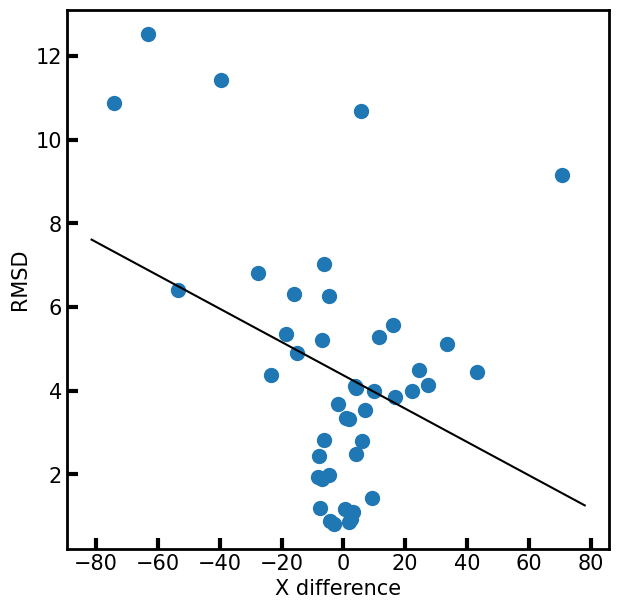

In [9]:
X=df["X"]
Y=df["RMSD"]

# Scatter plot
plt.scatter(X, Y, s=10**2, c='C0')
# Add correlation line
axes = plt.gca()
m, b = np.polyfit(X, Y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-',color='k')
plt.xlabel("X difference", fontsize=15)
plt.ylabel("RMSD", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(which='both',direction='in',length=8, width=3,)

# Save figure
plt.savefig("/home/cadeniran/Downloads/figs/rmsd-corrx.png", format='png', transparent=True, bbox_inches='tight')

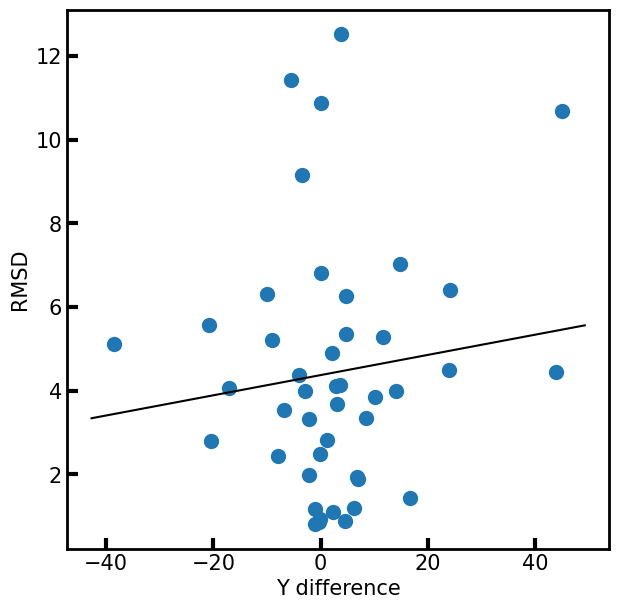

In [10]:
X=df["Y"]
Y=df["RMSD"]

# Scatter plot
plt.scatter(X, Y, s=10**2, c='C0')
# Add correlation line
axes = plt.gca()
m, b = np.polyfit(X, Y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-',color='k')
plt.xlabel("Y difference", fontsize=15)
plt.ylabel("RMSD", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(which='both',direction='in',length=8, width=3,)

# Save figure
plt.savefig("/home/cadeniran/Downloads/figs/rmsd-corry.png", format='png', transparent=True, bbox_inches='tight')